# LAB3 e LAb4: PCA, LDA e modelos polinomiais

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Luís Fonseca
## Número: 45125

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab3e4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab3e4Data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "X":             dados bi-dimensionais (840 amostras)
### 2. "y":              classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain": array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest": array boleano indicando os dados a serem usados para testar os classificadores


# Pergunta 1 - Discriminantes polinomiais:
## 1. Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## 2. Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## 3. Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

D=pickle.load(open('Lab3e4Data.p','rb'))
print(D.keys())

X = D['X']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1].T
X2 = X[:, f2].T
y1 = y[f1]
y2 = y[f2]

poly = PolynomialFeatures(degree=4,include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

rl = LinearRegression().fit(X1a, y1)
yea = np.round(abs(rl.predict(X1a)))
yeb = np.round(abs(rl.predict(X2a)))

dict_keys(['X', 'y', 'foldTrain', 'foldTest'])


In [2]:
cm_treino = confusion_matrix(y1, yea)

print('Erros no treino:', sum(y1!=yea))
print('Matriz de Confusão de Treino:\n', cm_treino)

cm_teste = confusion_matrix(y2, yeb)

print('Erros no teste:', sum(y2!=yeb))
print('Matriz de Confusão de Teste:\n', cm_teste)

Erros no treino: 15
Matriz de Confusão de Treino:
 [[51  2  0  0]
 [ 0 60  0  0]
 [ 0  5 44  4]
 [ 0  0  4 48]]
Erros no teste: 47
Matriz de Confusão de Teste:
 [[154   6   0   0   0]
 [  1 188   0   0   0]
 [  0  13 104   7   0]
 [  0   1  16 129   3]
 [  0   0   0   0   0]]


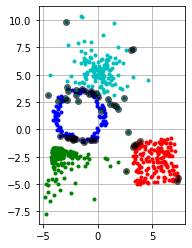

In [3]:
plt.plot(X2[y2==0,0], X2[y2==0,1], '.r')
plt.plot(X2[y2==1,0], X2[y2==1,1], '.g')
plt.plot(X2[y2==2,0], X2[y2==2,1], '.b')
plt.plot(X2[y2==3,0], X2[y2==3,1], '.c')
plt.plot(X2[y2!=yeb,0], X2[y2!=yeb,1], 'ok', alpha=.5)
plt.axis('scaled')
plt.grid()

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Conjunto de dados $\texttt{MNISTsmall.p}$:
## 1. Com os dados de treino calcule a matriz de PCA. Use o número mínimo de componentes principais de modo aos dados projetados terem 75% da variância total dos dados originais. Especifique (imprima) qual o número de componentes obtidas. 
## 2. Transforme os conjuntos de treino e teste com a transformação da alínea anterior.
## 3. Para os dados transformados aplique a transformação LDA usando a função $\texttt{LinearDiscriminantAnalysis}$ do $\texttt{sklearn}$.
## 4.  Use o classificador da alínea anterior e calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.

In [4]:
import scipy.linalg as la
D=pickle.load(open('MNISTsmall.p','rb'))
X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = np.vstack((np.ones(10000), X[:,f1]))
X2 = np.vstack((np.ones(5000), X[:, f2]))
y1 = y[f1]
y2 = y[f2]

Cx=np.cov(X1)

v, W = la.eig(Cx)

idx=np.argsort(-v)
v=v[idx]
v = v.real

W=W[:, idx]
W=W.real

v = v/np.sum(v)
L = np.cumsum(v)
    
print('Número de componentes: ', np.sum(L<=0.75),'\n')

Número de componentes:  32 



In [5]:
setentaCincoPorcento = np.sum(L <= 0.75) + 1
        
W=W[:,0:setentaCincoPorcento]

Y1=np.dot(W.T,X1)
Y2 = np.dot(W.T,X2)
Xr1 = np.dot(W,Y1)
Xr2 = np.dot(W,Y2)
print(Xr1.shape)
print(Xr2.shape)


(785, 10000)
(785, 5000)
